<a href="https://colab.research.google.com/github/Amaliastf/PCVK_Ganjil_2023/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 11

Amalia Salsa Lutfiana

3F/04/2141720228

**E. Pengayaan Materi KTP**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Muat 2 library berikut sebagai tahapan persiapan

In [40]:
import cv2
import cv2 as cv
import numpy as np
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [25]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_Per7"

# Membaca gambar
src = cv2.imread(path_plate)

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    img_path = os.path.join(path_plate, name_file)
    src = cv2.imread(img_path)
    blurred = src.copy()
    gray = blurred.copy()

    # Filtering
    for i in range(10):
        blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(ret, bw.shape)

141.0 (488, 800)
156.0 (680, 1055)
88.0 (338, 600)
144.0 (707, 1070)
168.0 (300, 493)
168.0 (300, 493)
140.0 (381, 608)
160.0 (636, 996)


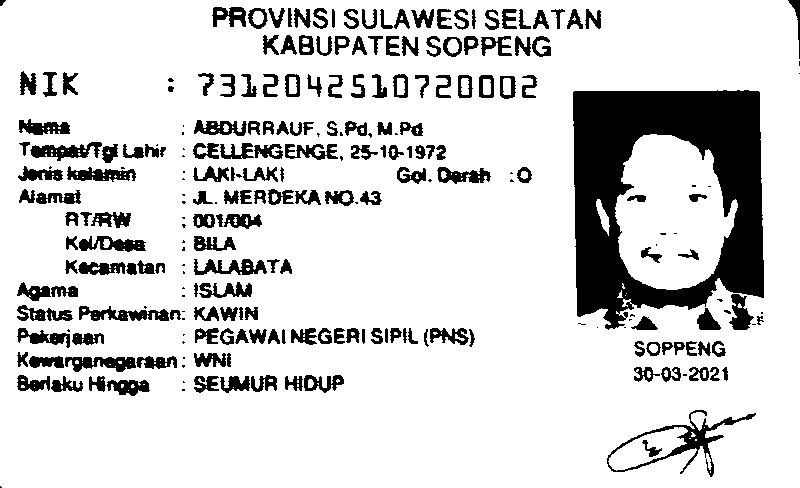

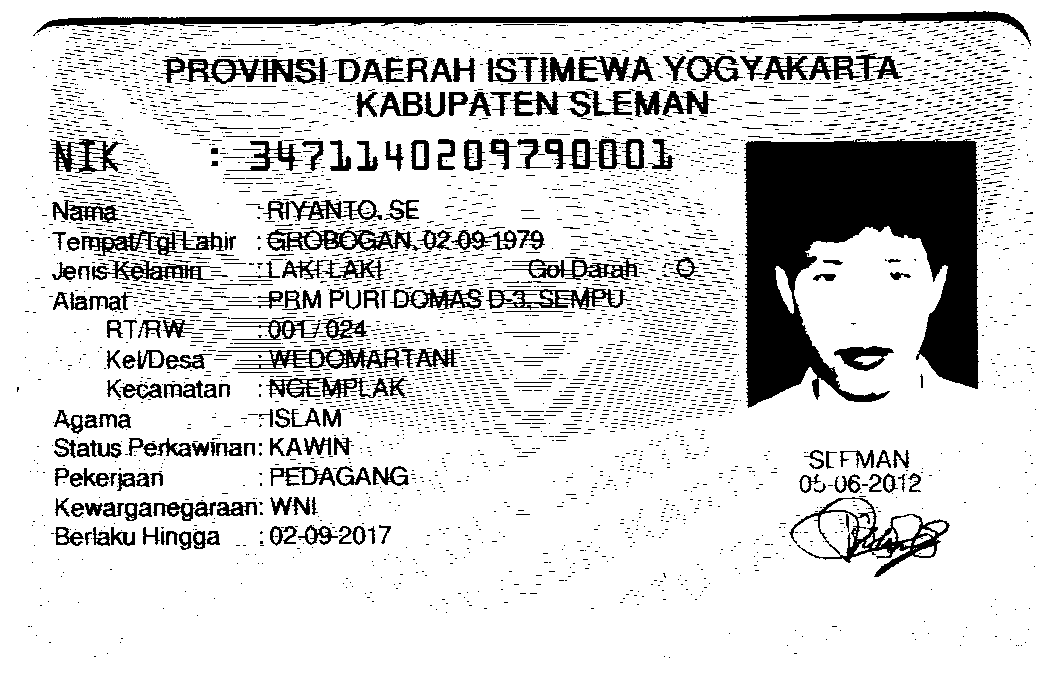

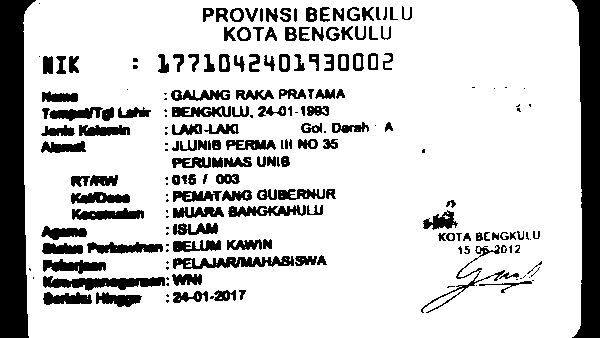

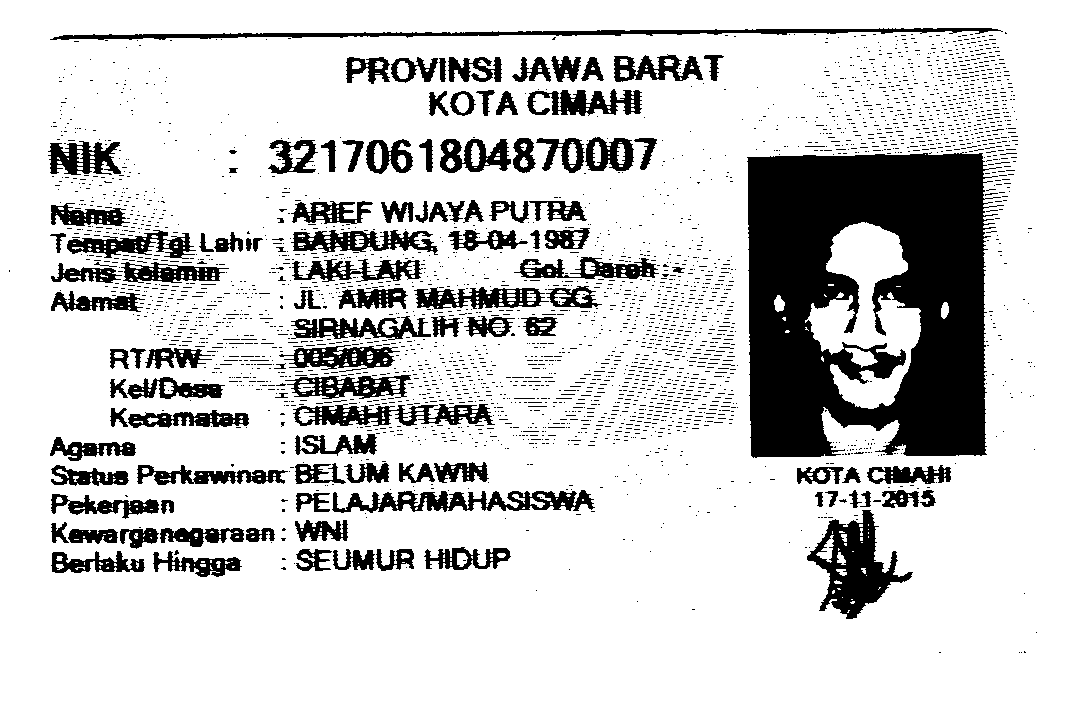

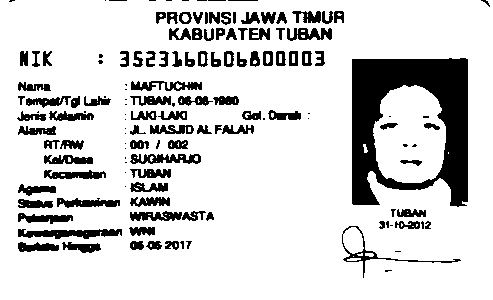

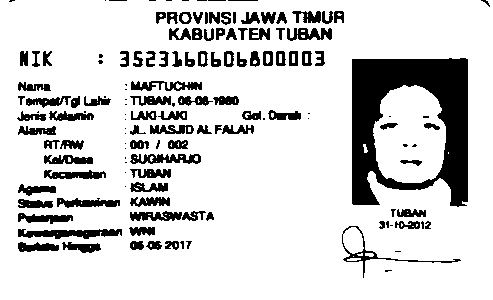

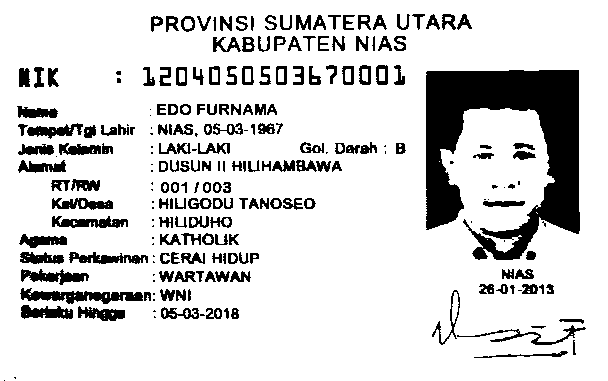

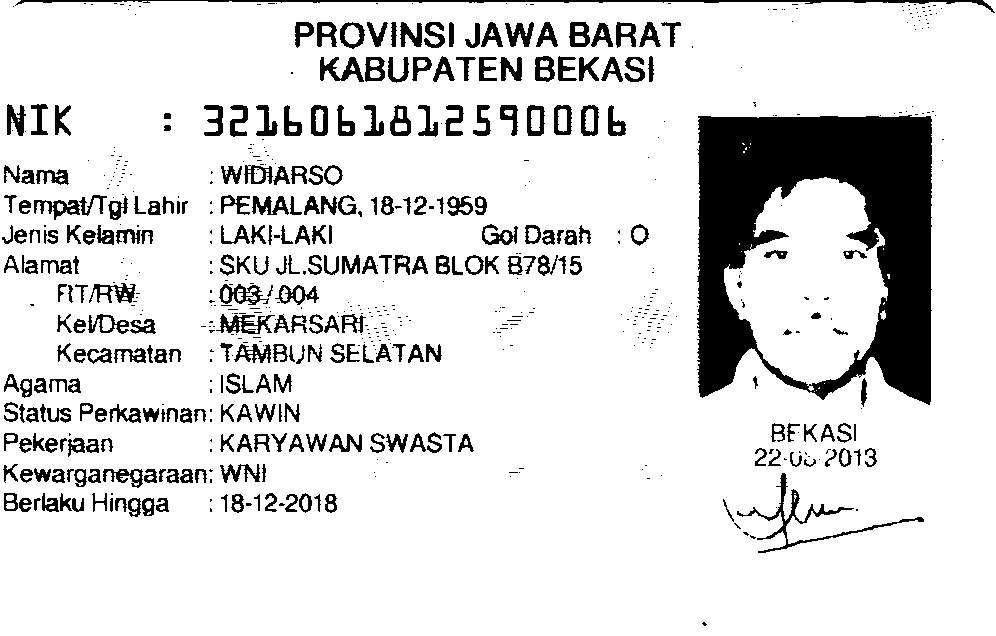

In [26]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_Per7"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    img_path = os.path.join(path_plate, name_file)
    src = cv2.imread(img_path)
    blurred = src.copy()
    gray = blurred.copy()

    # Filtering
    for i in range(10):
        blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan citra
    cv2_imshow(bw)


6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

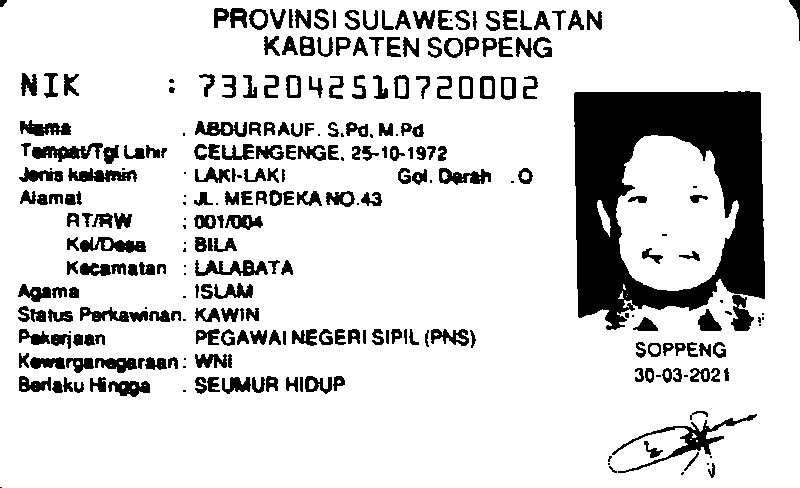

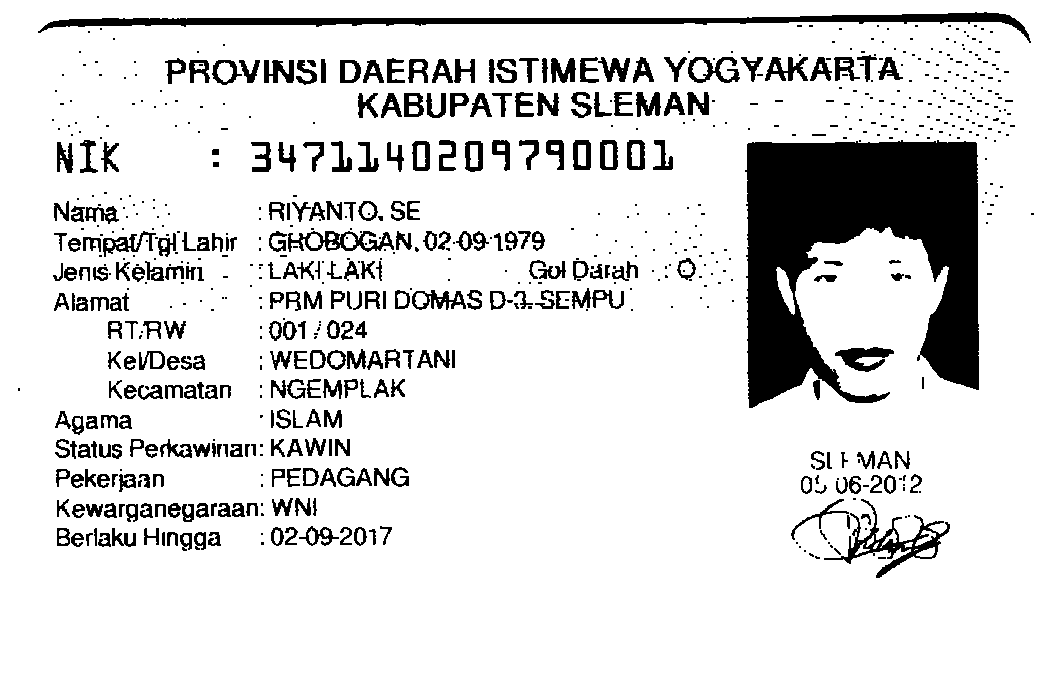

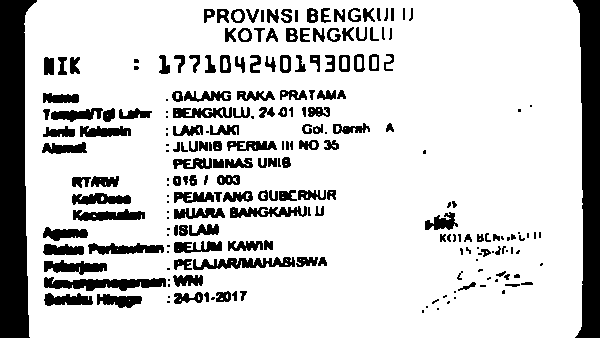

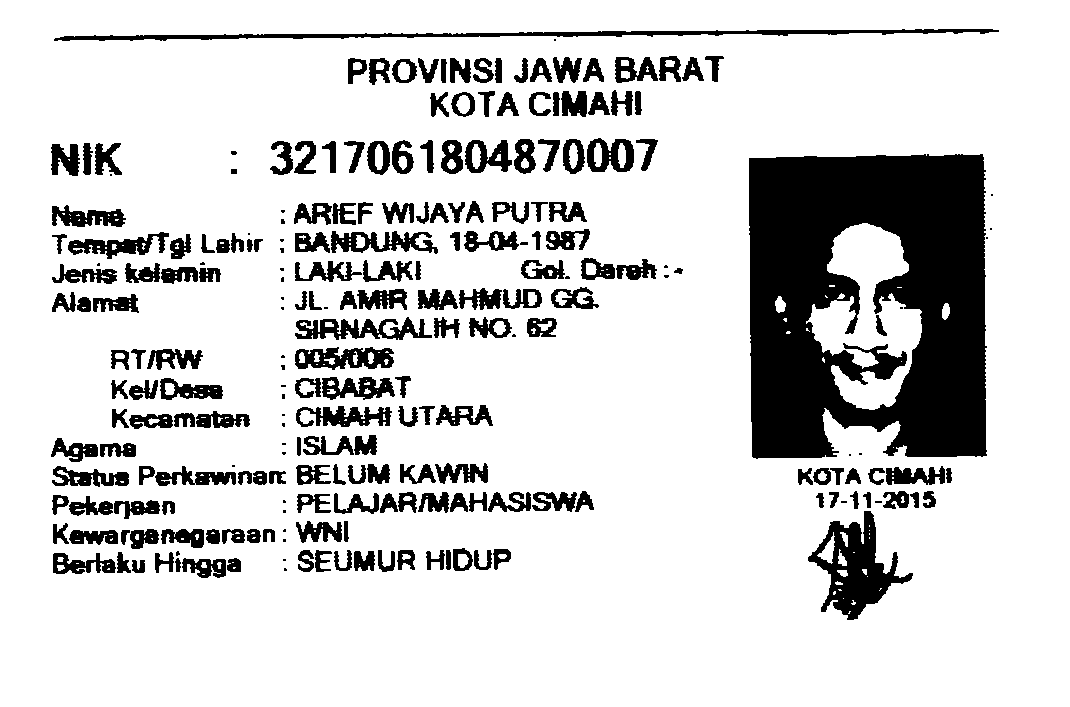

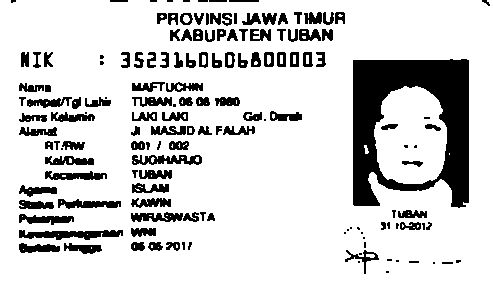

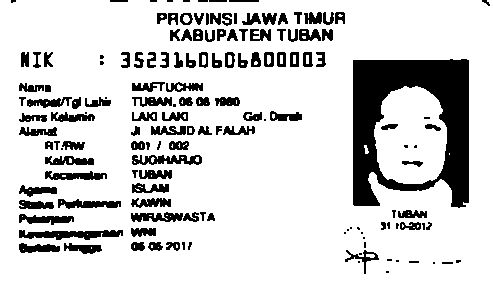

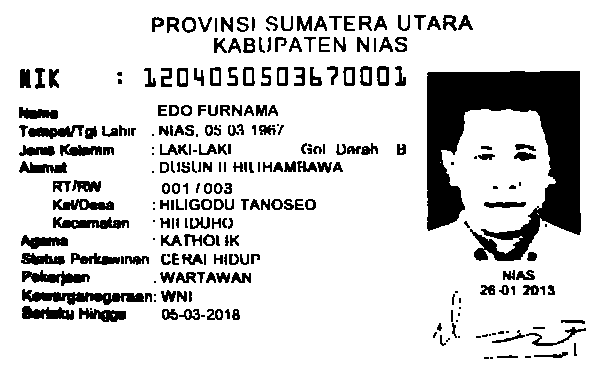

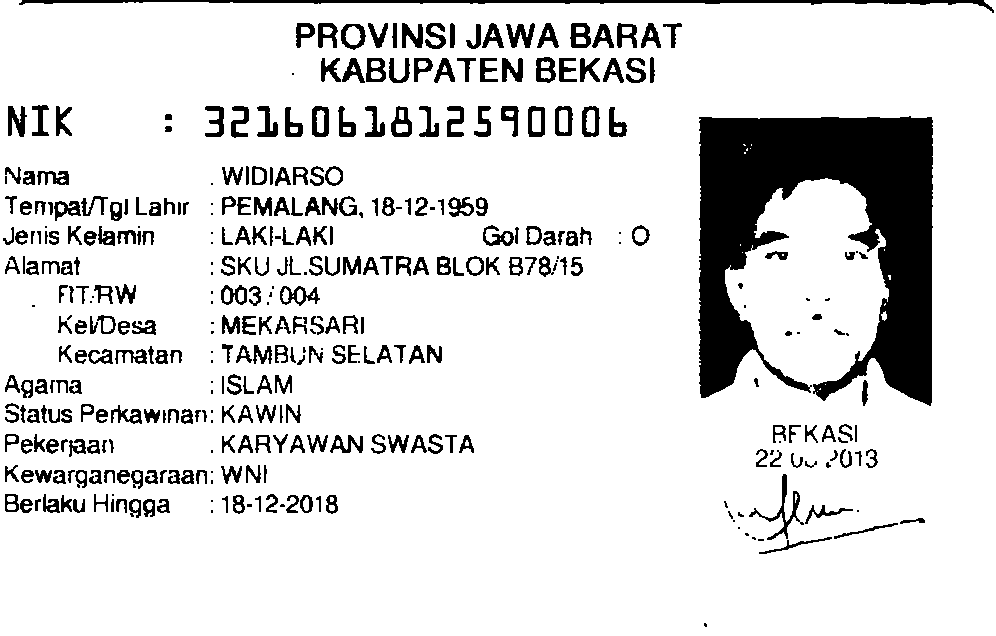

In [51]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_Per7"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    img_path = os.path.join(path_plate, name_file)
    src = cv2.imread(img_path)
    blurred = src.copy()
    gray = blurred.copy()

    # Filtering
    for i in range(10):
        blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menerapkan operasi morfologi (erosi dan dilasi)
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
    cv2_imshow(closing)


7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

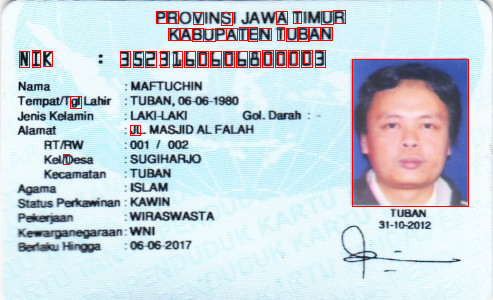

In [58]:
imageKtp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp4.png')

gray = cv2.cvtColor(imageKtp, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(imageKtp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(imageKtp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cv2_imshow(imageKtp)

**F. Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

**Kelompok 5 :**

1. Amalia Salsa Lutfiana 04/2141720228

2. Maulidio Farhan 19/2141720041

3. Yofandra Arta 30/2141720121

4. Raden Rizqi 25/2141720064

5. Roziq Mahbubi 27/2141720086

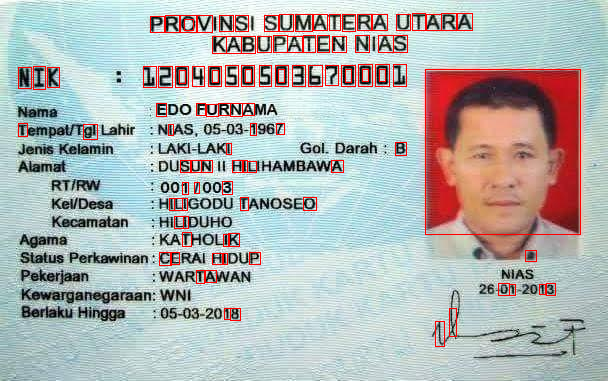

In [52]:
imageKtp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp5.png')

gray = cv2.cvtColor(imageKtp, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(imageKtp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(imageKtp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cv2_imshow(imageKtp)